In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile
import IPython.display as ipd

### Reading images into arrays, and saving arrays as images

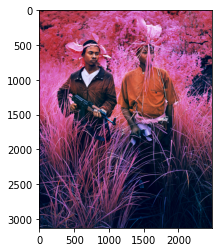

In [2]:
"""
read an image as a numpy array
"""
def read_image(path):
    image = cv2.imread(path)
    return image

img = read_image("Mosse_2012_Hot_Rats.jpg")

In [ ]:
"""
display an array as an image
"""
def plot_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

plot_image(img)

In [ ]:
"""
save a numpy array as an image
"""
def save_image(image, path="saved_image", file_extension=".jpg"):
    cv2.imwrite(str(path+file_extension), image)

save_image(img)

### Reading audio files into dataframes/arrays and saving dataframes/arrays to audio files

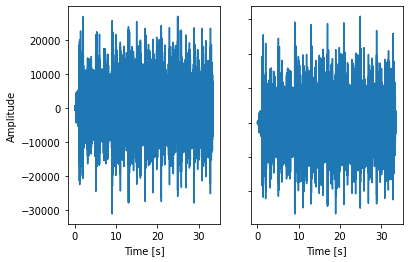

In [5]:
"""
read audio file as an array
"""
def read_audio(path):
    sr, x = scipy.io.wavfile.read(path)
    return x, sr # audio and sample rate

audio, sample_rate = read_audio("audio.wav")

In [ ]:
"""
plot audio file as a graph
"""
def plot_audio(audio, sample_rate=None, title=None):
    if sample_rate is None:
        sample_rate, audio = read_audio("audio.wav")
    length = audio.shape[0] / sample_rate
    time = np.linspace(0., length, audio.shape[0])

    left = audio[:,0] # left channel
    right = audio[:,1] # right channel

    fig, (ax1, ax2) = plt.subplots(1, 2) # define subplots
    fig.suptitle(title) # add title

    ax1.plot(time, left)
    ax2.plot(time, right)

    for ax in fig.get_axes():
        ax.set(xlabel="Time [s]", ylabel="Amplitude")
        ax.label_outer()

    plt.show()

plot_audio(audio, sample_rate)

In [22]:
"""
play audio from array
"""
def play_audio_from_array(audio, sample_rate):
    return ipd.Audio(audio.T, rate=sample_rate)

play_audio_from_array(audio, sample_rate)

# alternatively, you can simply call the following:
ipd.Audio(audio.T, rate=sample_rate)

In [17]:
"""
save an array as an audio file
"""

# Note that the array has to be integers, so you should
# scale the array appropriately to ensure floats are converted
# with only a controlled loss, or no loss of information.

def save_audio(audio, name="audio_file.wav"):
    audio = np.int16(audio/np.max(np.abs(audio)) * 32767)
    scipy.io.wavfile.write(name, len(audio), audio)

save_audio(np.random.uniform(-1,1,44100)) # save 44100 random samples between -1 and 1 to wav file